### Нахождение экстремума функции методом параболической интерполяции

In [1]:
import numpy as np

import math

import matplotlib
import matplotlib.pyplot as plt

In [2]:
def fff(x):
    return math.sin(20 * x) * math.cos(4 * x)

In [3]:
eps = 1e-6

In [4]:
def ppp(a,b):
    
    x = (a+b)/2.0
    #xk = ([a,x])
    ch = 1
    i = 2
    
    while ch:
        
        c1 = ( (x-a)*(fff(b)-fff(a)) - (b-a)*(fff(x)-fff(a)))  /  ((b-a)*(x-b)*(a-x)) #((b-a)*(b-x)*(x-a))
        c2 = (fff(x) - fff(a)) / (x-a) - c1*(x+a)
        c3 =  fff(a) - c1*(a**2) - c2*a
        
        if c1==0:
            return ('функция и так многочлен 2 степени, чего вы еще хотите?')
        
        else:
            xk = -c2/(2*c1)
            
            if c1<0:
                a = xk
                x = (a + b)/2.
                
            else:
                
                if math.fabs(fff(b)-fff(xk)) <= eps:
                    ch = 0
                
                else:
                    a = x
                    x = b
                    b = xk
            
            
    return (fff(xk))
    

#### Игорь придумал прекрасную функцию $f(x) = {\sin(20x) cos(4x)\,}$, на которой я благополучно проверила свой алгоритм:

In [5]:
a = 6.0
b = 6.4
ppp(a,b)

-0.9529805593578735

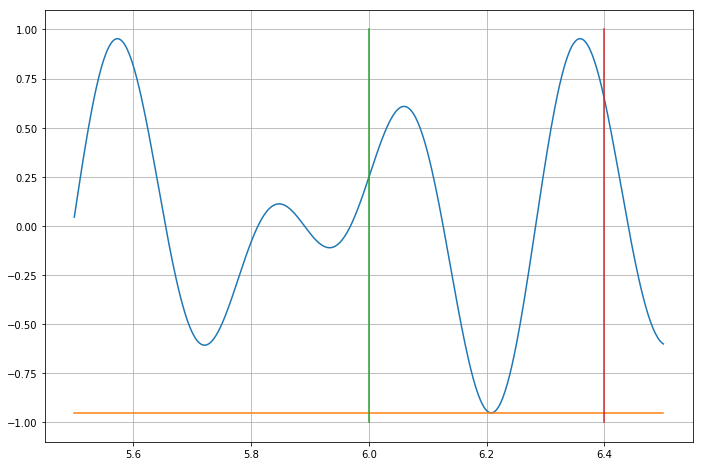

In [6]:
x = np.linspace(5.5, 6.5, 500)
Y = np.linspace(-1, 1, 100)
y = [fff(x) for x in x]
p = [ppp(a,b) for x in x]
A = [a for Y in Y]
B = [b for Y in Y]
#print(P)

fig = plt.figure()
fig.add_axes([0, 0, 1.5, 1.5])
plt.grid(True)

plt.plot(x, y)
plt.plot(x, p)
plt.plot(A, Y)
plt.plot(B, Y)
plt.show()